In [4]:
# !pip install yfinance
# !pip install arch

In [54]:
#Prediction of volatility using GARCH method


import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ticker= "ETH-USD"
stock_data = yf.download(ticker,start="2016-01-04", end="2022-05-19")

[*********************100%***********************]  1 of 1 completed


In [55]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [56]:
stock_data['Return'] = 100 * (stock_data['Close'].pct_change())

In [58]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,-6.741069
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,5.155507
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,-2.152342
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,2.860599


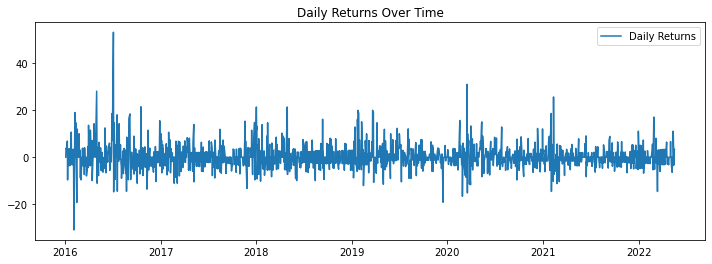

In [48]:
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

In [49]:
daily_volatility = stock_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  5.23%
Monthly volatility:  23.96%
Annual volatility:  83.00%


In [50]:
garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

mu         -0.058645
omega       3.927942
alpha[1]    0.211481
beta[1]     0.658120
Name: params, dtype: float64


                 h.1        h.2        h.3        h.4        h.5
Date                                                            
2022-05-18  25.56111  26.155919  26.673165  27.122963  27.514108


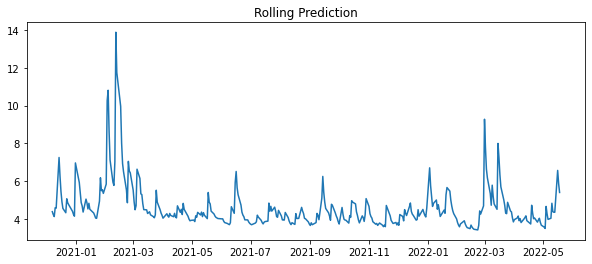

In [52]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = stock_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

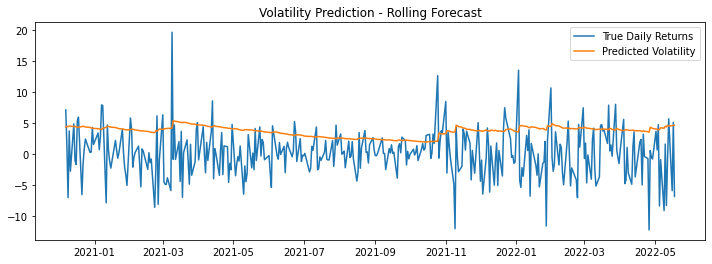

In [44]:
plt.figure(figsize=(12,4))
plt.plot(stock_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()